In [13]:
#
# Project 1, Question 1A, Part 1
#
import math
import tensorflow as tf
import numpy as np
import pylab as plt


# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

NUM_FEATURES = 36
NUM_CLASSES = 6

learning_rate = 0.01
epochs = 4000
batch_size = 32
num_neurons = 10
seed = 10
np.random.seed(seed)

#read train data
train_input = np.loadtxt('../provided files/sat_train.txt',delimiter=' ')
trainX, train_Y = train_input[:,:36], train_input[:,-1].astype(int)
trainX = scale(trainX, np.min(trainX, axis=0), np.max(trainX, axis=0))
train_Y[train_Y == 7] = 6

trainY = np.zeros((train_Y.shape[0], NUM_CLASSES))
trainY[np.arange(train_Y.shape[0]), train_Y-1] = 1 #one hot matrix

print(train_input)
# print(train_Y)


[[ 92. 115. 120. ... 113.  87.   3.]
 [ 84. 102. 106. ... 104.  79.   3.]
 [ 84. 102. 102. ... 104.  79.   3.]
 ...
 [ 68.  75. 108. ... 104.  85.   4.]
 [ 71.  87. 108. ... 104.  85.   4.]
 [ 71.  91. 100. ... 100.  81.   4.]]


In [14]:
# experiment with small datasets
trainX = trainX[:1000]
trainY = trainY[:1000]

n = trainX.shape[0]


# Create the model
x = tf.placeholder(tf.float32, [None, NUM_FEATURES])
y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES])

In [15]:
# Build the graph for the deep net

weights_h = tf.Variable(tf.truncated_normal([NUM_FEATURES,num_neurons], stddev=0.001))
biases_h = tf.Variable(tf.zeros([num_neurons]))

weights = tf.Variable(tf.truncated_normal([num_neurons, NUM_CLASSES], stddev=1.0/math.sqrt(float(NUM_FEATURES))), name='weights')
biases  = tf.Variable(tf.zeros([NUM_CLASSES]), name='biases')

h = tf.nn.relu(tf.matmul(x, weights_h) + biases_h)
logits = tf.matmul(h, weights) + biases

ridge_loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=logits)
ridge_param = tf.constant(0.000001)
regularization = tf.nn.l2_loss(weights) + tf.nn.l2_loss(weights_h)
loss = tf.reduce_mean(ridge_loss + ridge_param*regularization)

# Create the gradient descent optimizer with the given learning rate.
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

correct_prediction = tf.cast(tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1)), tf.float32)
accuracy = tf.reduce_mean(correct_prediction)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_acc = []
    for i in range(epochs):
        train_op.run(feed_dict={x: trainX, y_: trainY})
        train_acc.append(accuracy.eval(feed_dict={x: trainX, y_: trainY}))

        if i % 100 == 0:
            print('iter %d: accuracy %g'%(i, train_acc[i]))

iter 0: accuracy 0.508
iter 100: accuracy 0.508
iter 200: accuracy 0.508
iter 300: accuracy 0.508
iter 400: accuracy 0.682
iter 500: accuracy 0.693
iter 600: accuracy 0.704
iter 700: accuracy 0.705
iter 800: accuracy 0.708
iter 900: accuracy 0.709
iter 1000: accuracy 0.712
iter 1100: accuracy 0.712
iter 1200: accuracy 0.712
iter 1300: accuracy 0.712
iter 1400: accuracy 0.712
iter 1500: accuracy 0.713
iter 1600: accuracy 0.714
iter 1700: accuracy 0.714
iter 1800: accuracy 0.716
iter 1900: accuracy 0.72
iter 2000: accuracy 0.722
iter 2100: accuracy 0.729
iter 2200: accuracy 0.736
iter 2300: accuracy 0.745
iter 2400: accuracy 0.752
iter 2500: accuracy 0.759
iter 2600: accuracy 0.765
iter 2700: accuracy 0.77
iter 2800: accuracy 0.775
iter 2900: accuracy 0.784
iter 3000: accuracy 0.789
iter 3100: accuracy 0.795
iter 3200: accuracy 0.802
iter 3300: accuracy 0.807
iter 3400: accuracy 0.81
iter 3500: accuracy 0.815
iter 3600: accuracy 0.824
iter 3700: accuracy 0.827
iter 3800: accuracy 0.832
i

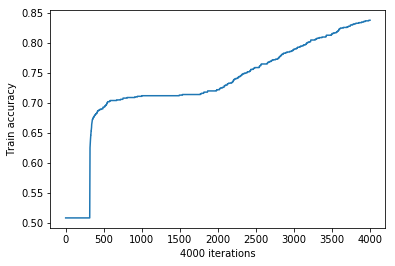

In [16]:
# plot learning curves
plt.figure(1)
plt.plot(range(epochs), train_acc)
plt.xlabel(str(epochs) + ' iterations')
plt.ylabel('Train accuracy')
plt.show()